In [ ]:
############Naive Bayes #####################
조건부 독립 : 확률변수 A, B가 독립이면, A와 B의 결합확률은 주변확률의 곱과 같다 
조건이 되는 별개의 확률 변수 C가 존재하며,  
조건이 되는 확률변수 C에 대한 A, B의 결합조건부 확률은 C에 대한 A, B의 조건부 확률과 같다 (조건부 독립)
일반적인 독립은 '무조건독립 확률'
조건부 독립 확률과   무조건독립 확률간의 관계가 없다 
(두 확률변수가 독립이라고 해서 항상 조건부 독립 확률이 되는 것은 아니며, 조건부 독립 확률이라고 해서 확률 변수가 항상 독립이 되는 것도 아님)

In [1]:
import numpy as np
C=np.random.normal(100, 15, 2000)
A=C+np.random.normal(0, 5, 2000) # 표준편차 5인 정규분포 데이터
B=C+np.random.normal(0, 5, 2000)  #표준편차 5인 정규분포 데이터

In [2]:
#시각화를 통해서 B, C 는 상관관계 있지만, A와 B는 서로 독립임을 확인

import matplotlib.pyplot as plt
plt.subplot(121)
plt.scatter(A, B)
plt.xlabel("A")
plt.xlabel("B")
plt.xlim(30, 180)
plt.xlim(30, 180)
plt.title("B, C  unconditional corr")
plt.subplot(122)

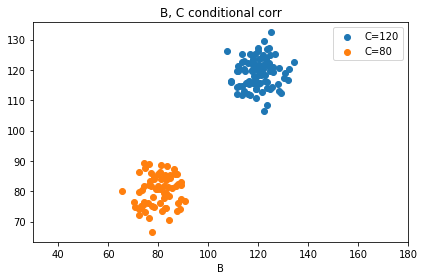

In [3]:
idx1 = (118<C) & (C<122)
idx2 = (78 < C) & (C < 82)

plt.scatter(A[idx1], B[idx1], label="C=120")
plt.scatter(A[idx2], B[idx2], label="C=80")
plt.xlabel("A")
plt.xlabel("B")
plt.xlim(30, 180)
plt.xlim(30, 180)
plt.legend()
plt.title("B, C conditional corr")
plt.tight_layout()
plt.show()

In [4]:
#조건부 확률변수 C와 두 확률변수 A, B는 상관관계가 있지만,

조건부 확률변수 C를 고정시켰을 때 두 확률변수 A, B는 독립임을 확인할 수 있음

Naive Bayes 분류 모델 은 모든 차원의 개별 독립 변수가 서로 조건부 독립이라는 가정을 사용합니다. 

GaussianNB:  연속적인 데이터에 적용, 정규분포 NB
BernouliNB :  이진 데이터에 적용, 
MultinomialNB : 다항분포 NB, 카운트 데이터(특성의 출현 횟수, 문장의 단어 출현횟수 )

BernouliNB, MultinomialNB 는 텍스트 데이터 분류 에 사용

SyntaxError: invalid syntax (<ipython-input-4-51031e7fc8e1>, line 3)

In [5]:
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB

iris = datasets.load_iris()  # 데이터 로드
features = iris.data
target = iris.target

classifer = GaussianNB()  # 가우시안 나이브 베이지 객체 생성
model = classifer.fit(features, target)  # 모델 훈련
new_observation = [[ 4,  4,  4,  0.4]]    #New Sample Data
model.predict(new_observation)   # 클래스 예측

array([1])

In [6]:
# 각 클래스별 사전 확률을 지정한 가우시안 나이브 베이즈 객체 생성
clf = GaussianNB(priors=[0.25, 0.25, 0.5])
model = classifer.fit(features, target)  # 모델  훈련 
new_observation = [[ 4,  4,  4,  0.4]]    #New Sample Data
model.predict(new_observation)   # 클래스 예측

array([1])

In [7]:
#GaussianNB의 속성 theta_은 정규분포의 기댓값
#GaussianNB의 속성 sigma_는 정규분포의 분산

#모의 데이터 생성
import scipy as sp
np.random.seed(0)
#다변량 정규값을 랜덤하게 생성 multivariate_normal( mean = None , cov = 1 , allow_singular = False , seed = None ) 
rv0 =sp.stats.multivariate_normal([-2, 2], [[1, 0.9], [0.9, 2]])   
rv1 =sp.stats.multivariate_normal([2, 2], [[1.2, -0.8], [-0.8, 2]])
X0 = rv0.rvs(40)
X1 = rv1.rvs(60)
X = np.vstack([X0, X1])
y = np.hstack([np.zeros(40), np.ones(60)])

C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 45936 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 53552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 54869 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\student\Anaconda3\envs\cpu_env\lib\site-p

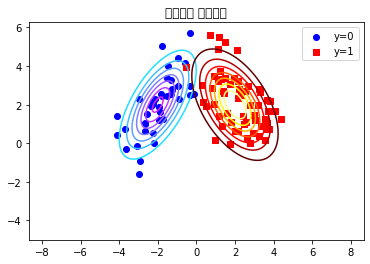

In [8]:
import matplotlib as mpl

xx1 = np.linspace(-5, 5, 100)
xx2 = np.linspace(-5, 5, 100)
XX1, XX2 = np.meshgrid(xx1, xx2)
plt.grid(False)
plt.contour(XX1, XX2, rv0.pdf(np.dstack([XX1, XX2])), cmap=mpl.cm.cool)
plt.contour(XX1, XX2, rv1.pdf(np.dstack([XX1, XX2])), cmap=mpl.cm.hot)
plt.scatter(X0[:, 0], X0[:, 1], marker="o", c='b', label="y=0")
plt.scatter(X1[:, 0], X1[:, 1], marker="s", c='r', label="y=1")
plt.legend()
plt.title("데이터의 확률분포")
plt.axis("equal")
plt.show()

In [9]:
from sklearn.naive_bayes import GaussianNB

model_norm = GaussianNB().fit(X, y)

#y 클래스의 종류와 각 클래스에 속하는 표본의 수, 그리고 그 값으로부터 구한 사전 확률
model_norm.classes_   #종속변수 Y의 클래스(라벨)
model_norm.class_count_  #종속변수 Y의 값이 특정한 클래스인 표본 데이터의 수
model_norm.class_prior_ #종속변수 Y의 무조건부 확률 분포 P(Y)

array([0.4, 0.6])

In [10]:
##설명변수 x의 기댓값 , 정규분포의 분산  (확률 분포의 모수)

model_norm.theta_[0], model_norm.sigma_[0]
model_norm.theta_[1], model_norm.sigma_[1]

(array([2.19130701, 2.12626716]), array([1.25429371, 1.93742544]))

In [11]:
x_new = [0, 0]  #새로운 관측 데이터 
model_norm.predict_proba([x_new])  # 예측확률

array([[0.48733438, 0.51266562]])

In [12]:
####다항 나이브베이즈 분류 ############################
# 스팸 메일 필터링 : BOW 인코딩을 할 때, 각 키워드가 출현한 빈도를 직접 입력 변수로 사용

X = np.array([
    [3, 4, 1, 2],
    [3, 5, 1, 1],
    [3, 3, 0, 4],
    [3, 4, 1, 2],
    [1, 2, 1, 4],
    [0, 0, 5, 3],
    [1, 2, 4, 1],
    [1, 1, 4, 2],
    [0, 1, 2, 5],
    [2, 1, 2, 3]])
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [13]:
from sklearn.naive_bayes import MultinomialNB
model_mult = MultinomialNB().fit(X, y)
model_mult.classes_            
model_mult.class_count_
np.exp(model_mult.class_log_prior_)  #종속변수 Y의 무조건부 확률분포의 로그 

array([0.4, 0.6])

In [14]:
# 각 클래스에 대한 가능도 확률분포를 구한다. 
# 예 :  다항분포 모형을 사용하므로 각 클래스를 4개의 면을 가진 주사위로 생각할 수 있다. 그리고 각 면이 나올 확률은 각 면이 나온 횟수를 주사위를 던진 전체 횟수로 나누면 된다. 
 
fc = model_mult.feature_count_  #각 클래스의 면이 나오는 횟수
fc
fc / np.repeat(fc.sum(axis=1)[:, np.newaxis], 4, axis=1)

array([[0.3       , 0.4       , 0.075     , 0.225     ],
       [0.10416667, 0.14583333, 0.375     , 0.375     ]])

In [15]:
#표본 데이터의 수가 적은 경우에는 모수에 대해   스무딩(smoothing)을 합니다.
# 표본 데이터의 수가 적은 경우에는 베르누이 모수가 0 또는 1이라는 극단적인 모수 추정값이 나올 수도 있다. 
# 현실적으로는 실제 모수값이 이런 극단적인 값이 나올 가능성이 적다. 
# 베르누이 모수가 0.5인 가장 일반적인 경우를 가정하여 0이 나오는 경우와 1이 나오는 경우, 두 개의 가상 표본 데이터를 추가한다. 그러면 0이나 1과 같은 극단적인 추정값이 0.5에 가까운 값으로 변한다. 
# 라플라스 스무딩(Laplace smoothing) 또는 애드원(Add-One) 스무딩
# 극단적인 추정을 피하기 위해 이 값을 가중치 1인 스무딩을 한 추정값을 사용한다.

model_mult.alpha
(fc + model_mult.alpha) /  (np.repeat(fc.sum(axis=1)[:, np.newaxis],4, axis=1) + model_mult.alpha * X.shape[1])

array([[0.29545455, 0.38636364, 0.09090909, 0.22727273],
       [0.11538462, 0.15384615, 0.36538462, 0.36538462]])

In [16]:
# 모수 추정치
theta = np.exp(model_mult.feature_log_prob_)  #다항분포의 모수의 로그
theta

array([[0.29545455, 0.38636364, 0.09090909, 0.22727273],
       [0.11538462, 0.15384615, 0.36538462, 0.36538462]])

In [17]:
# 어떤 메일에 1번부터 4번까지의 키워드가 각각 10번씩 나왔다면 다음처럼 확률을 구할 수 있다. 구해진 확률로부터 이 메일이 스팸임을 알 수 있다.
x_new = np.array([10, 10, 10, 10])  #새로운 관측 데이터
model_mult.predict_proba([x_new])

array([[0.38848858, 0.61151142]])

In [18]:
############베르누이 나이브 베이즈 분류
X = np.array([
    [0, 1, 1, 0],
    [1, 1, 1, 1],
    [1, 1, 1, 0],
    [0, 1, 0, 0],
    [0, 0, 0, 1],
    [0, 1, 1, 0],
    [0, 1, 1, 1],
    [1, 0, 1, 0],
    [1, 0, 1, 1],
    [0, 1, 1, 0]])
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
#데이터는 4개의 키워드를 사용하여 정상 메일 4개와 스팸 메일 6개를 BOW 인코딩한 행렬이다. 

In [19]:
X = np.array([
    [0, 1, 1, 0],
    [1, 1, 1, 1],
    [1, 1, 1, 0],
    [0, 1, 0, 0],
    [0, 0, 0, 1],
    [0, 1, 1, 0],
    [0, 1, 1, 1],
    [1, 0, 1, 0],
    [1, 0, 1, 1],
    [0, 1, 1, 0]])
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
#데이터는 4개의 키워드를 사용하여 정상 메일 4개와 스팸 메일 6개를 BOW 인코딩한 행렬이다. 

In [20]:
from sklearn.naive_bayes import BernoulliNB

model_bern = BernoulliNB().fit(X, y)
#y 클래스의 종류와 각 클래스에 속하는 표본의 수, 그리고 그 값으로부터 구한 사전 확률의 값
model_bern.classes_
model_bern.class_count_
np.exp(model_bern.class_log_prior_)

array([0.4, 0.6])

In [21]:
#각 클래스  k  별로, 그리고 각 독립변수  d  별로, 각각 다른 베르누이 확률변수라고 가정하여 모두 8개의 베르누이 확률변수의 모수를 구하면
fc = model_bern.feature_count_
fc
fc / np.repeat(model_bern.class_count_[:, np.newaxis], 4, axis=1)

array([[0.5       , 1.        , 0.75      , 0.25      ],
       [0.33333333, 0.5       , 0.83333333, 0.5       ]])

In [22]:
model_bern.alpha  #스무딩 가중치 값
#스무딩이 적용된 베르누이 모수값
theta = np.exp(model_bern.feature_log_prob_)
theta

array([[0.5       , 0.83333333, 0.66666667, 0.33333333],
       [0.375     , 0.5       , 0.75      , 0.5       ]])

In [23]:
 x_new = np.array([0, 1, 1, 1])  #새로운 관측 데이터 
model_bern.predict_proba([x_new])  #정상 , 스팸메일 분류 확률 확인

array([[0.34501348, 0.65498652]])

In [24]:
###########확률 보정 ########################
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.calibration import CalibratedClassifierCV

iris = datasets.load_iris()  # 데이터 로드
features = iris.data
target = iris.target

classifer = GaussianNB()  # 가우시안 나이브 베이즈 객체 생성

In [25]:
# 시그모이드 보정을 사용해 보정 교차 검증을 만듭니다.
classifer_sigmoid = CalibratedClassifierCV(classifer, cv=2, method='sigmoid')
classifer_sigmoid.fit(features, target) # 확률을 보정
new_observation = [[ 2.6,  2.6,  2.6,  0.4]]  #New Sample Data
classifer_sigmoid.predict_proba(new_observation)  # 보정된 확률을 확인 

array([[0.31859969, 0.63663466, 0.04476565]])

In [26]:
# 가우시안 나이브 베이즈를 훈련하고 클래스 확률을 예측합니다.
classifer.fit(features, target).predict_proba(new_observation)
classifer_sigmoid.predict_proba(new_observation) # 보정된 확률을 확인

array([[0.31859969, 0.63663466, 0.04476565]])

In [ ]:
##################군집 ########################
데이터 집합을 유사한 데이터들의 그룹으로 나누는 것 
데이터의 속성(특성)들을 분석하여 비슷한 속성(특성)을 가지는 데이터들끼리 클러스터(군집, 집단)로 묶는 알고리즘
어느 클러스터에도 속하지 못하는 관측 데이터가 존재할 수도 있다
정답이 없는 데이터들의 유사성만을 기준으로 판단합니다.
신용카드 부정 사용 탐지, 구매 패턴 분석 후 소비자 행동 특성을 그룹화하는데 사용
k-평균 군집화
DBSCAN 군집화
유사도 전파 군집화
계층적 군집화
스펙트럴 군집화
군집화 알고리즘들의 사용법과 모수가 서로 다름
군집 분석의 성능 지표 - 조정 랜드지수, 조정 상호정보량, 실루엣 계수

In [ ]:
# 랜드지수(Rand Index , RI)는 데이터가 원래 군집화되어 있는 정답이 필요함
랜드지수는 모든 데이터의 쌍의 개수에 대해 정답인 데이터 쌍의 개수 비율로 정의되므로 0~1사이의 값을 가지며, 1이 가장 좋은 성능을 의미합니다.

무작위 군집화에서 생성되는 랜드지수의 기대값은 크게 나오는 경향이 있기 때문에 랜드지수의 기댓값을 원래 값에서 빼서 기댓값과 분산을 재조정한것을 조정랜드지수(ARI)

# 조정 상호정보량 - 두 확률변수의  상호 의존성을 측정한 값

In [ ]:
# 실루엣 계수 - 동일 군집내에 데이터의 거리는 가깝고, 다른 군집의 데이터와의 거리는 멀다는 특성
동일 군집내에 데이터의 거리가 다른 군집의 데이터와의 거리보다 가까우면 양수, 
다른 군집의 데이터와의 거리가 가까우면 음수

# k-평균 군집화
데이터간의 유사성을 기준으로 클러스터 중심까지의 거리를 이용하는 분석방법
데이터 집합에 임의의 k개의 클러스터를 주고 데이터와 클러스터의 중심까지의 거리를 계산하여 가장 가까운 클러스터로 데이터를 할당 (k값에 따라 모델의 성능이 달라집니다)
k값이 크면 모델의 정확도가 높아지지만 너무 크면 분석 효과가 작아진다
KMeans(n_clusters, n_init, max_iter,  random_state)
가장 단순하면서 빠른 군집화 알고리즘
KMeans 군집화는 유클리드 거리 계산을 사용하므로 너무 차원이 높은 겨우 군집화 선능이 떨어지므로 차원 축소 후에 사용해야 합니다.

In [27]:
# 초기 중심위치에 따라 결과가 달라질 수 있다 > 시각화를 통해 확인
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, _ = make_blobs(n_samples=20, random_state=4)

def plot_KMeans(n) :
    model = KMeans(n_clusters=2, init="random", n_init=1, max_iter=n, random_state=6).fit(X)
    c0, c1 = model.cluster_centers_
    plt.scatter(X[model.labels_ ==0, 0], X[model.labels_==0, 1], marker='v', facecolor='r', edgecolors='k')
    plt.scatter(X[model.labels_ ==1, 0], X[model.labels_==1, 1], marker='^', facecolor='y', edgecolors='k')
    plt.scatter(c0[0], c0[1], marker='v', c="r", s=200)
    plt.scatter(c1[0], c1[1], marker='^', c="y", s=200)
    plt.grid(False)
    plt.title('iter count={}, score={:5.2f}'.format(n, -model.score(X)))

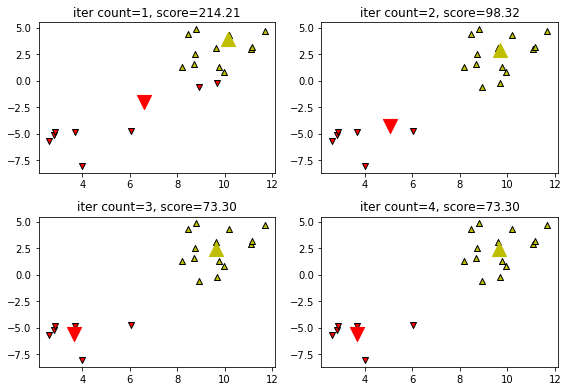

In [28]:
plt.figure(figsize=(8, 8))
plt.subplot(321)
plot_KMeans(1)
plt.subplot(322)
plot_KMeans(2)
plt.subplot(323)
plot_KMeans(3)
plt.subplot(324)
plot_KMeans(4)
plt.tight_layout()
plt.show()

In [ ]:
kmean 알고리즘 수행 
1. n차원 공간에서 k개의 중심점을 임의로 선택
2.  중심점에서 각 샘플 데이터까지의 거리 계산
3. 각 데이터 포인트를 가장 가까운 중심점에 할당하여 클러스터 갱신
4. 각 중심점에 선택된 데이터 포인트들의 평균 위치로 중심점을 다시 이동
5. 1~4 과정을 수렴할때(중심점의 변화가 거의 없는, 할당된 군집의 변화가 없을때)까지 반복

중심점 centroid 선택 방법 - 랜덤하게 설정, 수동으로 설정, kmean++ 
#k-mean++ 방식을 사용하여 초기 클러스터 중심점을 정하여 군집화 수행 실습
kmeans 단점은 알고리즘이 수렴하지 않는 문제가 발생할 수 있으므로 초기 중심점의 seed를 최적화하는 알고리즘 kmean++을 사용합니다.

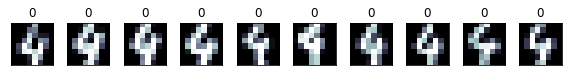

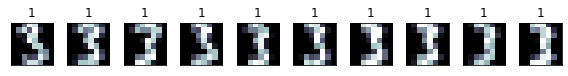

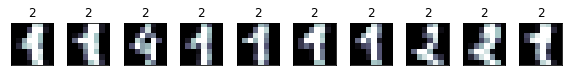

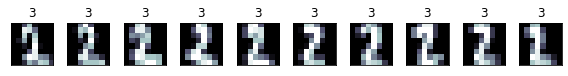

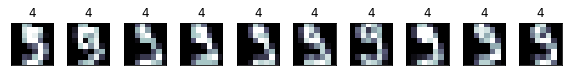

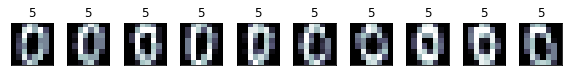

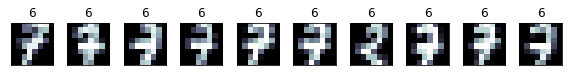

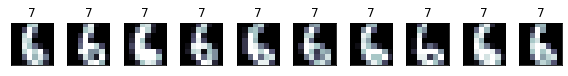

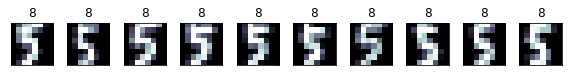

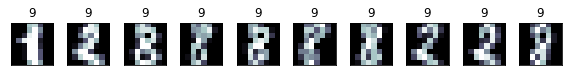

In [29]:
from sklearn.datasets import load_digits

digits = load_digits()

model = KMeans(init="k-means++", n_clusters=10, random_state=0)
model.fit(digits.data)
y_pred = model.labels_

def show_digits(images, labels):
    f = plt.figure(figsize=(8, 2))
    i = 0
    while (i < 10 and i < images.shape[0]):
        ax = f.add_subplot(1, 10, i + 1)
        ax.imshow(images[i], cmap=plt.cm.bone)
        ax.grid(False)
        ax.set_title(labels[i])
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.tight_layout()
        i += 1

def show_cluster(images, y_pred, cluster_number):
    images = images[y_pred == cluster_number]
    y_pred = y_pred[y_pred == cluster_number]
    show_digits(images, y_pred)    

for i in range(10):
    show_cluster(digits.images, y_pred, i)

In [30]:
#성능 지표
from sklearn.metrics import confusion_matrix

confusion_matrix(digits.target, y_pred)
#군집화 결과의 ARI, AMI, 실루엣계수값 확인

from sklearn.metrics.cluster import adjusted_mutual_info_score, adjusted_rand_score, silhouette_score

print("ARI:", adjusted_rand_score(digits.target, y_pred))
print("AMI:", adjusted_mutual_info_score(digits.target, y_pred))
print("Silhouette Score:", silhouette_score(digits.data, y_pred))

ARI: 0.6703800183468681
AMI: 0.7417664506416767
Silhouette Score: 0.18249069204151275


In [31]:
# k-means는 중심위치와 모든 데이터 사이의 거리를 계산해야 하므로 데이터 개수가 많아지면 계산량이 늘어나므로 데이터 수가 많을 때는 미니배치 k-means 군집화 방법을 사용하면 계산량을 줄일 수 있습니다.

from sklearn.cluster import MiniBatchKMeans
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=150000, cluster_std=[1.0, 2.5, 0.5], random_state=170)

import time
start = time.time()  # 시작 시간 저장 
model1 = KMeans(n_clusters=3).fit(X)
print("time :", time.time() - start)

time : 0.8174948692321777


In [32]:
start = time.time()  # 시작 시간 저장  
model2 = MiniBatchKMeans(n_clusters=3, batch_size=1000, compute_labels=True).fit(X)
print("time :", time.time() - start)
#미니배치 크기 batch_size 매개변수로 설정

time : 0.17189264297485352


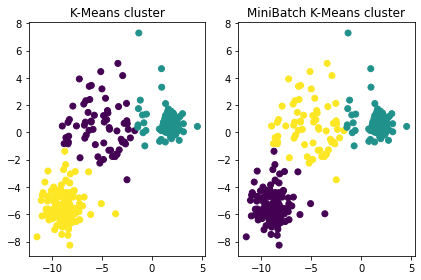

In [33]:
# KMeans와 MiniBatchKMeans의  군집화 결과를 시각화하여 비교(거의 동일하게 군집화함)

idx = np.random.randint(150000, size=300)
plt.subplot(121)

plt.scatter(X[idx, 0], X[idx, 1], c=model1.labels_[idx])
plt.title("K-Means cluster")
plt.subplot(122)
plt.scatter(X[idx, 0], X[idx, 1], c=model2.labels_[idx])
plt.title("MiniBatch K-Means cluster")
plt.tight_layout()
plt.show()

In [35]:
###############################################################
import pandas as pd

uci_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/\
00292/Wholesale%20customers%20data.csv'
df = pd.read_csv(uci_path, header=0)
print(df.head())   
print(df.info())  
print(df.describe())

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB
None
          Channel      Region          Fresh          Milk       G

In [36]:
#분석에 사용할 속성 선택 (모든 속성 선색 - 비지도 학습)
X = df.iloc[:, :]
print(X[:5])

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


In [37]:
#설명 변수 데이터를 정규화 전처리
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit(X).transform(X)
print(X[:5])

[[ 1.44865163  0.59066829  0.05293319  0.52356777 -0.04111489 -0.58936716
  -0.04356873 -0.06633906]
 [ 1.44865163  0.59066829 -0.39130197  0.54445767  0.17031835 -0.27013618
   0.08640684  0.08915105]
 [ 1.44865163  0.59066829 -0.44702926  0.40853771 -0.0281571  -0.13753572
   0.13323164  2.24329255]
 [-0.69029709  0.59066829  0.10011141 -0.62401993 -0.3929769   0.6871443
  -0.49858822  0.09341105]
 [ 1.44865163  0.59066829  0.84023948 -0.05239645 -0.07935618  0.17385884
  -0.23191782  1.29934689]]


In [38]:
#KMeans 군집화 (중심점 설정은 k-means++,  중심점개수 5,  초기점 설정수 =10)
# 군집화된 결과 labels_

kmeans = KMeans(init='k-means++', n_clusters=5, n_init=10)
kmeans.fit(X)   
cluster_label = kmeans.labels_   
print(cluster_label)

[0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 1 0 1 1 1 1 1 1 0 1
 0 0 1 1 1 0 0 0 0 0 4 0 0 1 1 0 0 1 1 4 0 1 1 0 4 0 0 1 4 1 0 1 1 1 1 1 0
 0 1 1 0 1 1 1 0 0 1 0 4 4 1 1 1 1 1 4 1 0 1 0 1 1 1 0 0 0 1 1 1 0 0 0 0 1
 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 0 0 1 0 0 0 1 1 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 3 1
 1 1 1 0 0 1 1 1 0 1 1 2 0 2 2 0 0 2 2 2 0 2 2 2 0 2 4 2 2 0 2 0 2 0 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 4 2 2 2 2 2 2 2
 2 2 2 2 2 0 2 0 2 0 2 2 2 2 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 2 0
 2 0 0 2 0 0 0 0 0 0 0 2 2 0 2 2 0 2 2 0 2 2 2 0 2 2 2 2 2 3 2 2 2 2 2 0 2
 4 2 0 2 2 2 2 0 0 1 0 1 1 0 0 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 0 0 1 1 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1]


In [39]:
# 예측 결과를 데이터프레임에 추가
df['Cluster'] = cluster_label
print(df.head())   

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656     7561     214              2674   
1        2       3   7057  9810     9568    1762              3293   
2        2       3   6353  8808     7684    2405              3516   
3        1       3  13265  1196     4221    6404               507   
4        2       3  22615  5410     7198    3915              1777   

   Delicassen  Cluster  
0        1338        0  
1        1776        0  
2        7844        0  
3        1788        1  
4        5185        0  


C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\student\Ana

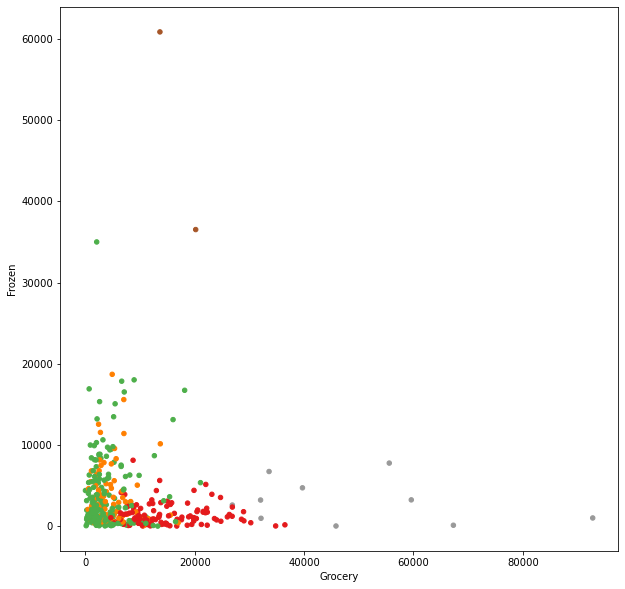

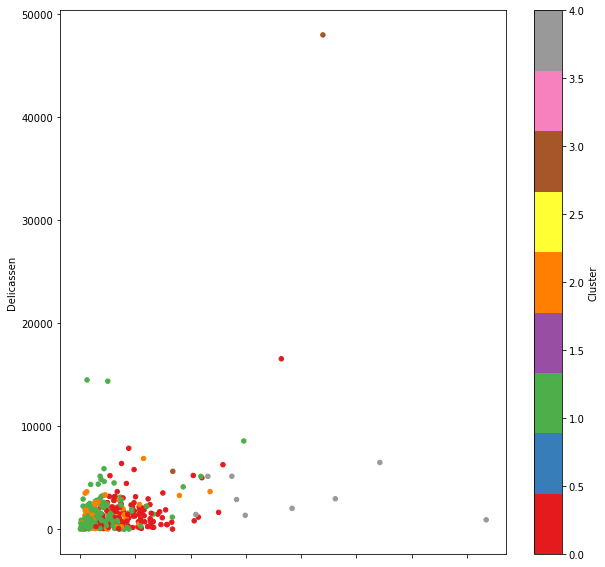

In [40]:
# 그래프로 표현 - 시각화
df.plot(kind='scatter', x='Grocery', y='Frozen', c='Cluster', cmap='Set1', 
        colorbar=False, figsize=(10, 10))
df.plot(kind='scatter', x='Milk', y='Delicassen', c='Cluster', cmap='Set1', 
        colorbar=True, figsize=(10, 10))
plt.show()
plt.close()

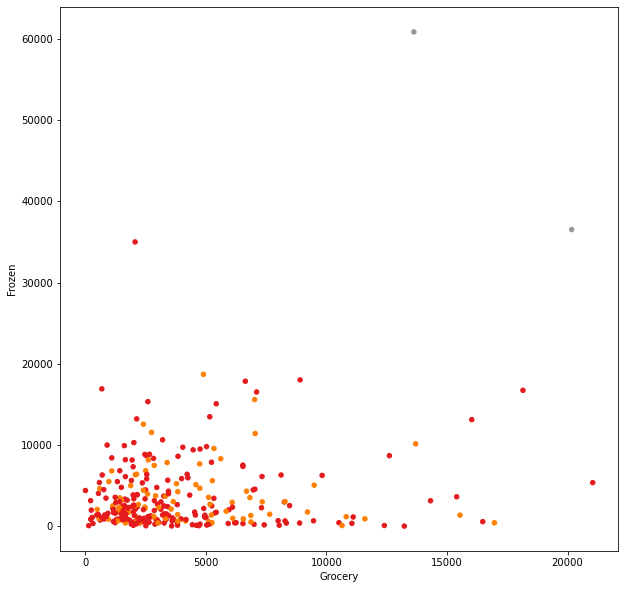

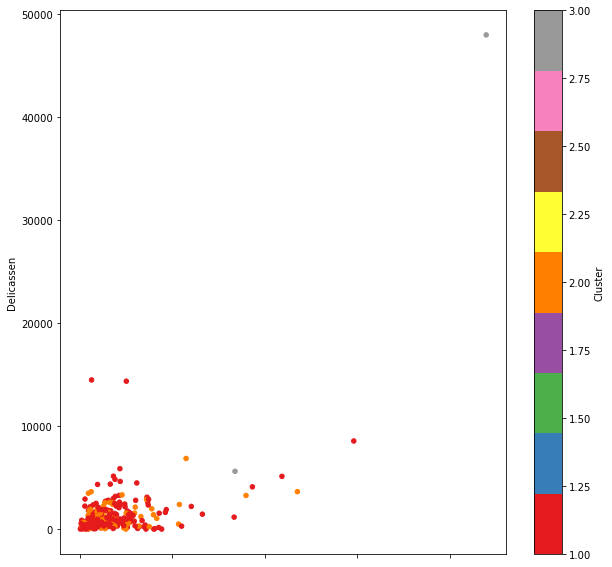

In [41]:
#값이 몰려 있는 구간을 자세하게 분석
mask  =(df['Cluster']==0) | (df['Cluster']==4)
ndf = df[~mask]
ndf.plot(kind='scatter', x='Grocery', y='Frozen', c='Cluster', cmap='Set1', 
        colorbar=False, figsize=(10, 10))
ndf.plot(kind='scatter', x='Milk', y='Delicassen', c='Cluster', cmap='Set1', 
        colorbar=True, figsize=(10, 10))
plt.show()
plt.close()

In [ ]:
DBSCAN(Density-Based Spatial Clustering of Applications with Noise) : 데이터 위치의 공간 밀집도를 기준으로 군집화

K-Means는 군집 모양이 원형인 경우에 잘 동작하고 원형이 아닌 경우 잘 동작하지 않습니다.
군집 개수를 직접 지정해야 합니다.

DBSCAN은 데이터 형태에 영향을 받지 않으며, 군집 개수를 직접 지정할 필요가 없습니다.
초기 데이터로부터 근접한 데이터를 찾아 군집을 확장하는 방식
최소 거리
최소 데이터 개수 (밀집 지역을 정의하기 위한 최소 필요 이웃 개수)
반지름 R공간에 최소 M개의 포인트가 존재하는 점
코어 포인트 (핵심 데이터)
반지름 R공간에 다른 코어 포인트가 있을 경우 => 경계 포인트
코어 포인트도 아니고 경계 포인트도 아닌 데이터는 Noise(outlier)

eps매개변수 : 이웃을 정의하기 위한 거리
min_samples : 핵심 데이터를 정의하기 위한 최소(필요한) 이웃영역안의 데이터 개수
labels_ :  군집 결과 클래스 번호,  -1은 아웃라이어
core_sample_indices_ : 핵심 데이터의 인덱스 

In [42]:
from sklearn.datasets import make_circles, make_moons
from sklearn.cluster import DBSCAN

n_samples = 1000
np.random.seed(2)
X1, y1 = make_circles(n_samples=n_samples, factor=.5, noise=.09)
X2, y2 = make_moons(n_samples=n_samples, noise=.1)

def plot_DBSCAN(title, X, eps, xlim, ylim):
    model = DBSCAN(eps=eps)
    y_pred = model.fit_predict(X)
    idx_outlier = model.labels_ == -1
    plt.scatter(X[idx_outlier, 0], X[idx_outlier, 1], marker='x', lw=1, s=20)
    plt.scatter(X[model.labels_ == 0, 0], X[model.labels_ == 0, 1], marker='o', facecolor='g', s=5)
    plt.scatter(X[model.labels_ == 1, 0], X[model.labels_ == 1, 1], marker='s', facecolor='y', s=5)
    X_core = X[model.core_sample_indices_, :]
    idx_core_0 = np.array(list(set(np.where(model.labels_ == 0)[0]).intersection(model.core_sample_indices_)))
    idx_core_1 = np.array(list(set(np.where(model.labels_ == 1)[0]).intersection(model.core_sample_indices_)))
    plt.scatter(X[idx_core_0, 0], X[idx_core_0, 1], marker='o', facecolor='g', s=80, alpha=0.3)
    plt.scatter(X[idx_core_1, 0], X[idx_core_1, 1], marker='s', facecolor='y', s=80, alpha=0.3)
    plt.grid(False)
    plt.xlim(*xlim)
    plt.ylim(*ylim)
    plt.xticks(())
    plt.yticks(())
    plt.title(title)
    return y_pred

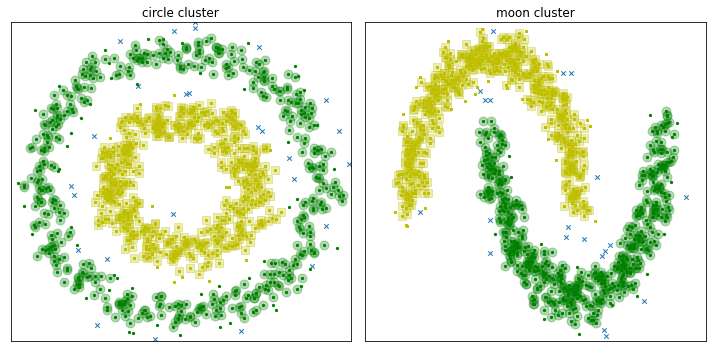

In [43]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
y_pred1 = plot_DBSCAN("circle cluster", X1, 0.1, (-1.2, 1.2), (-1.2, 1.2))
plt.subplot(122)
y_pred2 = plot_DBSCAN("moon cluster", X2, 0.1, (-1.5, 2.5), (-0.8, 1.2))
plt.tight_layout()
plt.show()

In [44]:
#성능 지표 (ARI, AMI) 확인
from sklearn.metrics.cluster import adjusted_mutual_info_score, adjusted_rand_score

print("동심원 군집 ARI:", adjusted_rand_score(y1, y_pred1))
print("동심원 군집 AMI:", adjusted_mutual_info_score(y1, y_pred1))
print("초승달 군집 ARI:", adjusted_rand_score(y2, y_pred2))
print("초승달 군집 AMI:", adjusted_mutual_info_score(y2, y_pred2))

동심원 군집 ARI: 0.9414262371038592
동심원 군집 AMI: 0.8967648464619999
초승달 군집 ARI: 0.9544844153926417
초승달 군집 AMI: 0.9151495815452475


In [18]:
#계층적 군집화
여러 개의 군집 중에서 가장 유사도가 높거나 거리가 가까운 군집 두개를 선택하여 하나로 합쳐가면서 군집 개수를 줄이는 방법
최초 군집개수는 데이터 개수와 동일(모든 군집이 하나의 데이터만 가진다)
계층적 군집화는 모든 군집 간에 거리를 계산(측정)해야 한다.

거리 측정 방법 - 비계층적 방법, 
비계층적 측정 방법 : 중심 거리(두 중심점간의 거리, 군집간의 거리), 단일거리(최소거리) , 완전거리(최장 거리),  평균 거리(계산량이 많음)
계층적 측정 방법 :  이전 단계에서 계층적 방법으로 합쳐진 군집이 있다고 가정하고 이 정보를 사용하는 측정법
중앙값 거리 , 가중 거리, 와드 거리

SyntaxError: invalid syntax (<ipython-input-18-7193a87120b4>, line 91)